In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from bentdna import shapefourier
workfolder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

### Part 0: Initialize

In [2]:
host = 'a_tract_21mer'
s_agent = shapefourier.ShapeAgent(workfolder, host)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists


### Part 1: Read $l_i$ and $\theta$

In [5]:
s_agent.read_l_modulus_theta()

### Part 2: $\theta(s)$ from MD, Frame-ID: 1

In [12]:
frame_id = 6000 # Ad hoc
df_filter = s_agent.get_filter_df(frame_id)

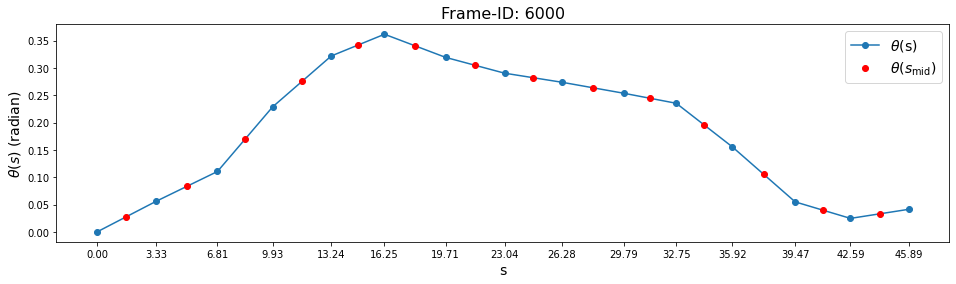

In [13]:
lbfz = 14
s_list, theta_list = s_agent.get_slist_thetalist(frame_id)
s_mid_list, interpolation_list = s_agent.get_smid_and_interpolation_theta(frame_id)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
ax.plot(s_list, theta_list, '-o', label=r'$\theta(\mathrm{s})$')
ax.set_xlabel("s", fontsize=lbfz)
ax.set_ylabel(r"$\theta(s)$ (radian)", fontsize=lbfz)
title = f'Frame-ID: {frame_id}'
ax.set_title(title, fontsize=16)
ax.set_xticks(s_list)
ax.plot(s_mid_list, interpolation_list, 'o', color='red', label=r'$\theta(s_{\mathrm{mid}})$')
ax.legend(fontsize=14)
#plt.savefig("fromMD.png", dpi=100)
plt.show()

### Part 3: $\sqrt{\frac{2}{L}}\cos{(\frac{n \pi s}{L})}$,  $n$ from 0 to 24

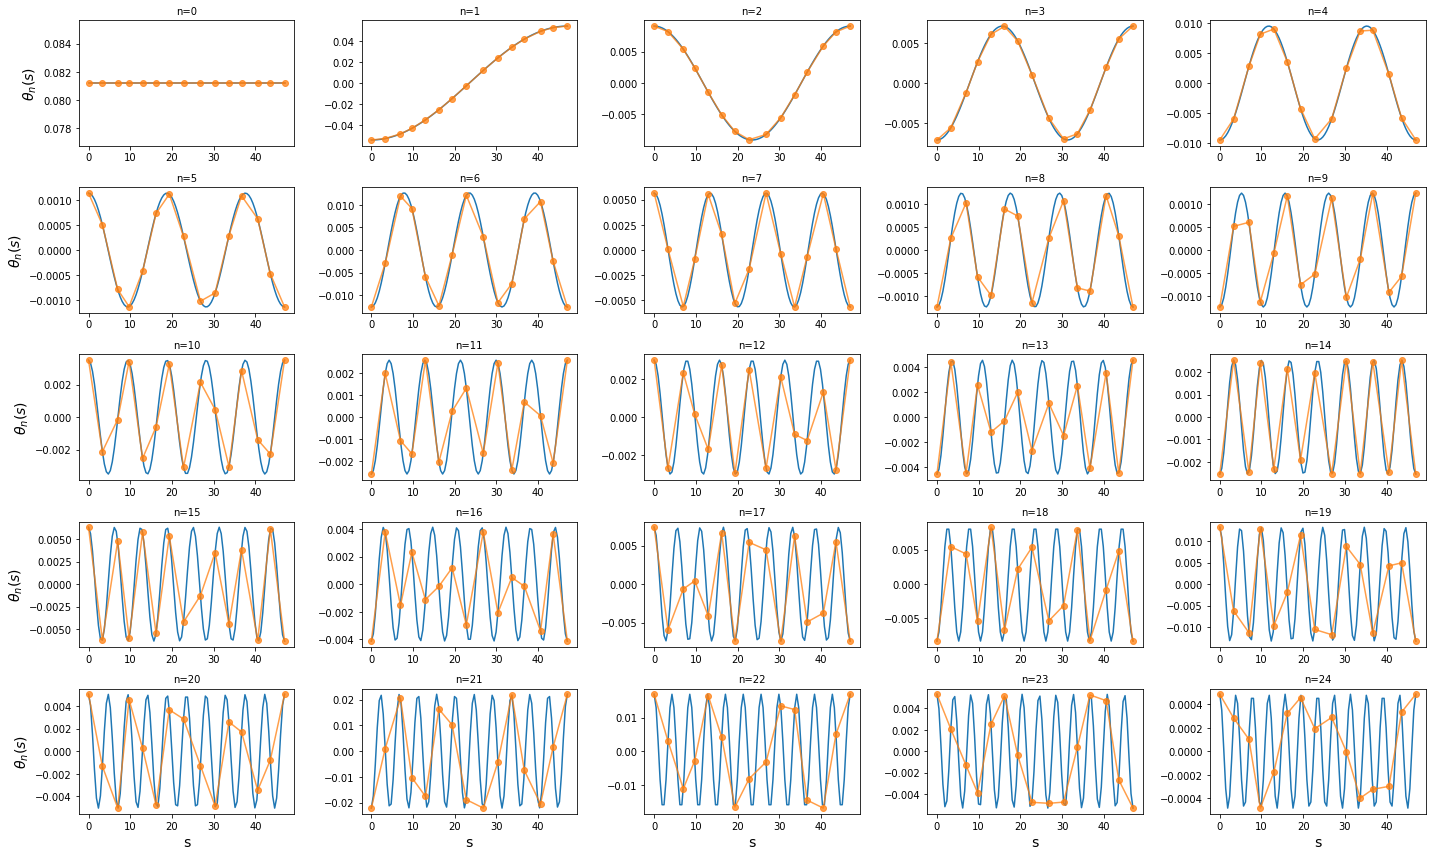

In [24]:
xarray = np.linspace(s_list[0], s_list[-1], num=100)
nrows = 5
ncols = 5

L = s_agent.get_L_of_frameid(frame_id)
out_scale_factor = np.sqrt(2 / L)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,12))

an_list = list()
n = 0
for row_id in range(nrows):
    for col_id in range(ncols):
        ax = axes[row_id, col_id]
        an = s_agent.get_an(n, df_filter)
        if n == 0:
            an = an / 2
        factor = n * np.pi / L
        in_cos_term = factor * xarray
        cos_list = np.cos(in_cos_term)
        cos_list = (an * out_scale_factor) * cos_list
        ax.plot(xarray, cos_list)
        in_cos_term_2 = factor * np.array(s_list)
        cos_list_2 = np.cos(in_cos_term_2)
        cos_list_2 = (an * out_scale_factor) * cos_list_2
        ax.plot(s_list, cos_list_2, '-o', alpha=0.75)
        if col_id == 0:
            ax.set_ylabel(r'$\theta_{n}(s)$', fontsize=lbfz)
        if row_id == 4:
            ax.set_xlabel("s", fontsize=lbfz)
        ax.set_title(f'n={n}',fontsize=10)
        an_list.append(an)
        n += 1
        
plt.tight_layout()
#plt.savefig("theta_n.png", dpi=100)
plt.show()

### Part 4: $a_n$ bar plot

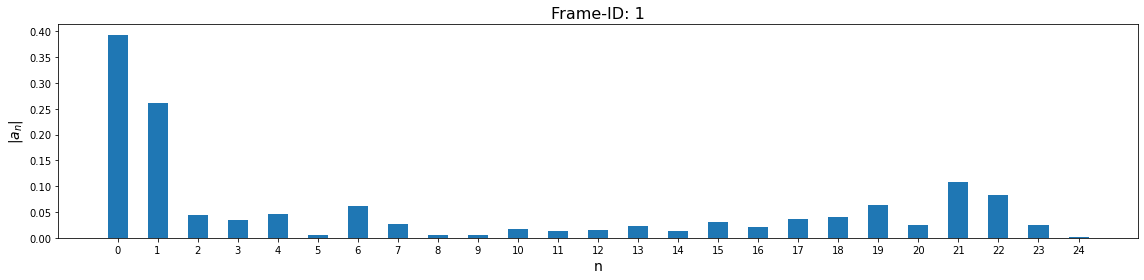

In [32]:
w = 0.5
nlist = range(25)

fig, ax = plt.subplots(ncols=1, nrows=1,  figsize=(16,4))
ax.bar(nlist, np.abs(an_list), w)
ax.set_xticks(nlist)
ax.set_xlabel("n", fontsize=lbfz)
ax.set_ylabel(r'$\left|a_n\right|$', fontsize=lbfz)
title = f'Frame-ID: {frame_id}'
ax.set_title(title, fontsize=16)
plt.tight_layout()
#plt.savefig("an_barplot.png", dpi=100)
plt.show()

### Part 5: $\cos{(\frac{n \pi}{L}s_i^{mid})}$

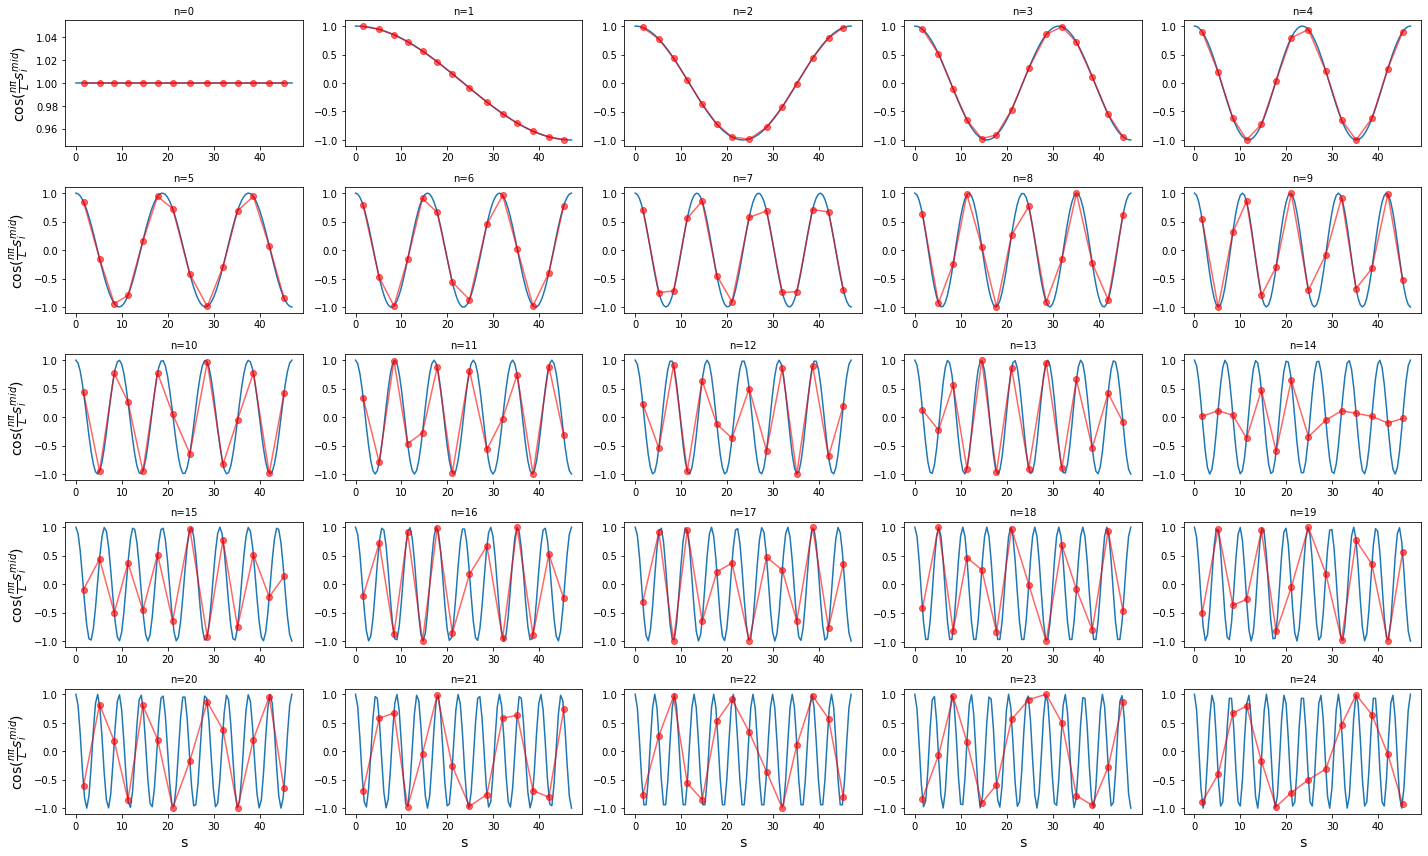

In [19]:
xarray = np.linspace(s_list[0], s_list[-1], num=100)
nrows = 5
ncols = 5

L = s_agent.get_L_of_frameid(frame_id)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,12))

n = 0
for row_id in range(nrows):
    for col_id in range(ncols):
        ax = axes[row_id, col_id]
        factor = n * np.pi / L
        in_cos_term = factor * xarray
        cos_list = np.cos(in_cos_term)
        ax.plot(xarray, cos_list)
        
        in_cos_term_2 = factor * np.array(s_mid_list)
        cos_list_2 = np.cos(in_cos_term_2)
        ax.plot(s_mid_list, cos_list_2, '-o', alpha=0.6, color='red')
        if col_id == 0:
            ax.set_ylabel(r'$\cos{(\frac{n \pi}{L}s_i^{mid})}$', fontsize=lbfz)
        if row_id == 4:
            ax.set_xlabel("s", fontsize=lbfz)
        ax.set_title(f'n={n}',fontsize=10)
        n += 1
        
plt.tight_layout()
#plt.savefig("cos_smid.png", dpi=100)
plt.show()

### Part 6: Approximation

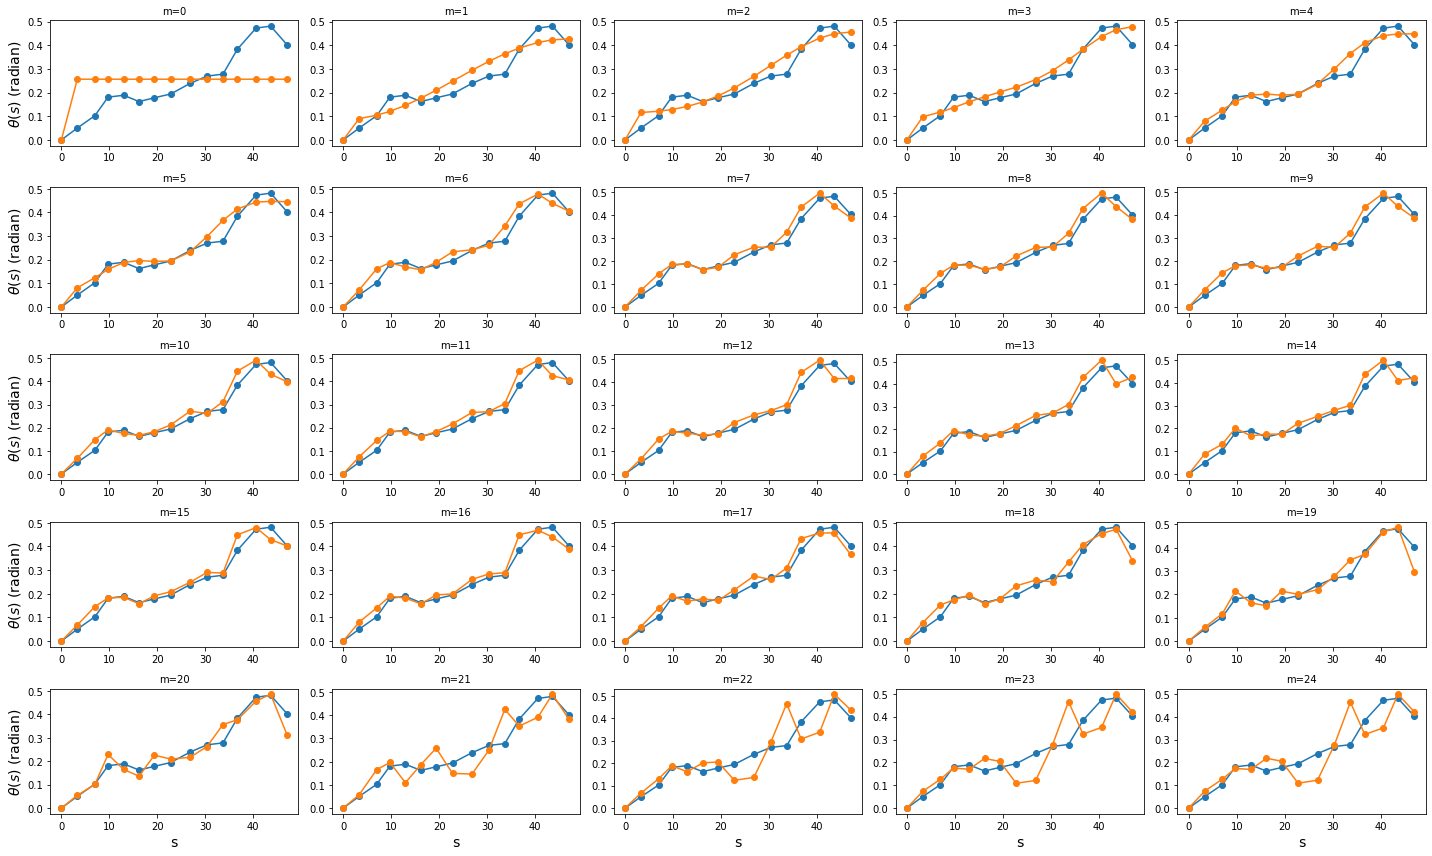

In [21]:
xarray = np.linspace(s_list[0], s_list[-1], num=100)
nrows = 5
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,12))

n = 0
for row_id in range(nrows):
    for col_id in range(ncols):
        s_list, appr_theta_list = s_agent.get_approximate_theta(frame_id, 0, n)
        ax = axes[row_id, col_id]
        ax.plot(s_list, theta_list, '-o', label=r'from MD')
        ax.plot(s_list, appr_theta_list, '-o', label=r'Approximation')

        if col_id == 0:
            ax.set_ylabel(r'$\theta(s)$ (radian)', fontsize=lbfz)
        if row_id == 4:
            ax.set_xlabel("s", fontsize=lbfz)
        ax.set_title(f'm={n}',fontsize=10)
        n += 1
        
plt.tight_layout()
#plt.savefig("approximation.png", dpi=100)
plt.show()